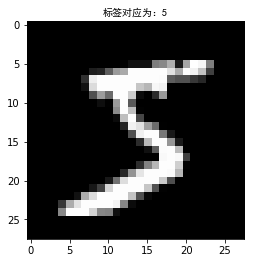

(60000, 10)
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.] [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


In [16]:
import numpy as np
import struct
import matplotlib.pyplot as plt


def readfile(path1,path2):
    with open(path1,'rb') as f1:
        buf1 = f1.read()
    with open(path2,'rb') as f2:
        buf2 = f2.read()
    return buf1, buf2

def get_image(buf1,m):
    image_index = 0
    image_index += struct.calcsize('>IIII')
    im = []
    for _ in range(m):
        temp = struct.unpack_from('>784B', buf1, image_index) # '>784B'的意思就是用大端法读取784个unsigned byte
        im.append(np.reshape(temp,(28, 28)))
        image_index += struct.calcsize('>784B')  # 每次增加784B
    return im

def get_label(buf2,m): # 得到标签数据
    label_index = 0
    label_index += struct.calcsize('>II')
    return struct.unpack_from('>'+str(m)+'B', buf2, label_index)

image_data, label_data = readfile(r'MNIST_data\train-images.idx3-ubyte',r'MNIST_data\train-labels.idx1-ubyte')
im = get_image(image_data,60000)
label = get_label(label_data,60000)

plt.subplot(1, 1, 1)
title = u"标签对应为："+ str(label[0])
plt.title(title, fontproperties='SimHei')
plt.imshow(im[0], cmap='gray')
plt.show()


data_test, label_test = readfile(r'MNIST_data\t10k-images.idx3-ubyte',r'MNIST_data\t10k-labels.idx1-ubyte')
im_test = get_image(image_data,10000)
label_test = get_label(label_data,10000)


import numpy as np
import keras
from keras import backend as K

x_train = np.array(im)
y_train = np.array(label)

x_test = np.array(im_test)
y_test = np.array(label_test)

x_train = x_train.reshape(x_train.shape[0], 28,28) #喂进去是一个四维张量，还有通道值
x_test = x_test.reshape(x_test.shape[0], 28,28)

    
# 把数值类标签转为10维向量，标签对应位为1其余为0
y_train = keras.utils.np_utils.to_categorical(y_train, 10)
y_test = keras.utils.np_utils.to_categorical(y_test, 10)
print(y_train.shape)
print(y_train[0],y_test[0])

In [30]:
from keras.models import Sequential
from keras.layers.recurrent import SimpleRNN
from keras.layers import Dense, Dropout, Flatten,Activation
from keras.optimizers import SGD

# build RNN model
model = Sequential()

# RNN cell
model.add(SimpleRNN(
    # for batch_input_shape, if using tensorflow as the backend, we have to put None for the batch_size.
    # Otherwise, model.evaluate() will get error.
    batch_input_shape=(None, 28, 28),       # Or: input_dim=INPUT_SIZE, input_length=TIME_STEPS,
    units=200,
    unroll=True,
))

# output layer
model.add(Dense(10))
model.add(Activation('softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=128, epochs=2,
         verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, batch_size=32,verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 21s - loss: 1.3883 - acc: 0.4842 - val_loss: 1.3156 - val_acc: 0.5114
Epoch 2/2
60000/60000 [==============================] - 21s - loss: 1.3106 - acc: 0.5039 - val_loss: 1.3261 - val_acc: 0.5073
Test loss: 1.32613546696
Test accuracy: 0.5073


In [43]:
print(np.argmax(model.predict(x_test[:10]),axis=1))
print(model.predict(x_test[:3]))

[3 0 4 1 9 2 1 3 4 1]
[[ 0.10614084  0.0117702   0.048769    0.55958241  0.00230638  0.13111624
   0.00115699  0.00478396  0.13066609  0.00370782]
 [ 0.29581049  0.05182849  0.10653934  0.15353316  0.00222519  0.17260253
   0.0065907   0.00093372  0.20908743  0.00084893]
 [ 0.00393975  0.01677148  0.03092736  0.0117751   0.67002207  0.01426596
   0.00102727  0.02264348  0.07161984  0.15700772]]


In [44]:
print(np.argmax(y_test[:10],axis=1))
print(y_test[:3])

[5 0 4 1 9 2 1 3 1 4]
[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]
